<a href="https://colab.research.google.com/github/GeraldL19/loan_default_prediction/blob/main/Credit_risk_trial_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --pre pycaret

In [3]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pycaret.classification as pyc
from pycaret.classification import *

ModuleNotFoundError: ignored

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [17]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [18]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df2 = df

Trnaforming categorical values into numerical value

In [7]:
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df2['person_home_ownership'] = labelencoder.fit_transform(df2['person_home_ownership']) #fitting and transforming the desired categorical column.
df2['loan_intent'] = labelencoder.fit_transform(df2['loan_intent'])
df2['loan_grade'] = labelencoder.fit_transform(df2['loan_grade'])
df2['cb_person_default_on_file'] = labelencoder.fit_transform(df2['cb_person_default_on_file'])

In [23]:
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


Replacing missing values with the means of the column

In [8]:
df2.fillna(df2.mean(numeric_only=True).round(1), inplace=True)

In [26]:
df2.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object

Normalising the column containing continuous values

In [16]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','person_income','person_income','person_income']
df2[cols_to_norm] = StandardScaler().fit_transform(df2[cols_to_norm])

Stting up pycaret

In [17]:
s = setup(df2, target = 'loan_status', train_size = 0.7)

,Description,Value
0,Session id,2674
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 12)"
5,Transformed train set shape,"(22806, 12)"
6,Transformed test set shape,"(9775, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [18]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9360,0.9451,0.7246,0.9759,0.8315,0.7931,0.8066,1.7250
xgboost,Extreme Gradient Boosting,0.9349,0.9448,0.7375,0.9538,0.8317,0.7922,0.8023,0.1660
rf,Random Forest Classifier,0.9301,0.9274,0.7073,0.9620,0.8151,0.7732,0.7872,1.7430
et,Extra Trees Classifier,0.9229,0.9190,0.6955,0.9343,0.7972,0.7509,0.7635,1.1530
gbc,Gradient Boosting Classifier,0.9225,0.9251,0.6921,0.9359,0.7956,0.7491,0.7622,1.6830
knn,K Neighbors Classifier,0.8867,0.8536,0.6048,0.8297,0.6994,0.6318,0.6439,0.4120
ada,Ada Boost Classifier,0.8864,0.8975,0.6553,0.7884,0.7156,0.6454,0.6497,0.4460
dt,Decision Tree Classifier,0.8849,0.8401,0.7606,0.7254,0.7424,0.6684,0.6689,0.1390
lr,Logistic Regression,0.8439,0.8473,0.4585,0.7249,0.5616,0.4724,0.4909,0.3800
lda,Linear Discriminant Analysis,0.8430,0.8462,0.4792,0.7067,0.5710,0.4793,0.4929,0.0750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

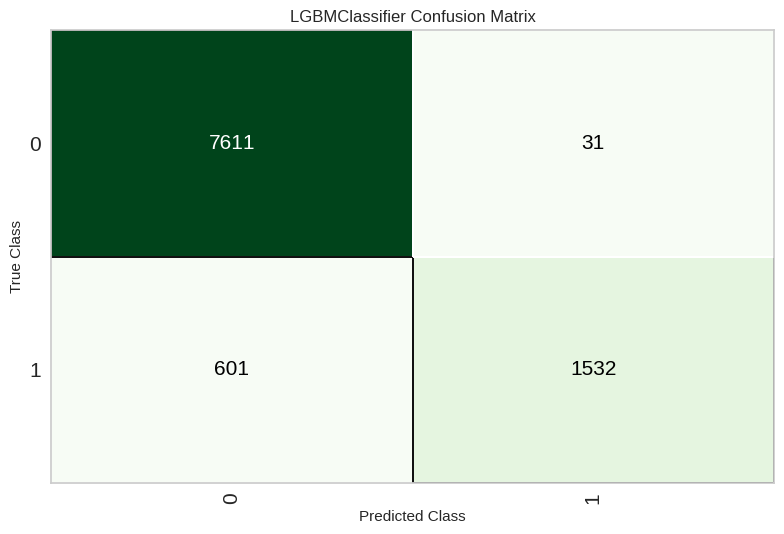

In [21]:
plot_model(best, plot = 'confusion_matrix')

Random Forest with sklearn

In [19]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [15]:
x = df2.drop('loan_status', axis=1)
y = df2['loan_status']

In [18]:
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, shuffle=True)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.929923273657289


In [26]:
recall = recall_score(y_test, y_pred)
print("recall:", recall)

recall: 0.7103799814643188


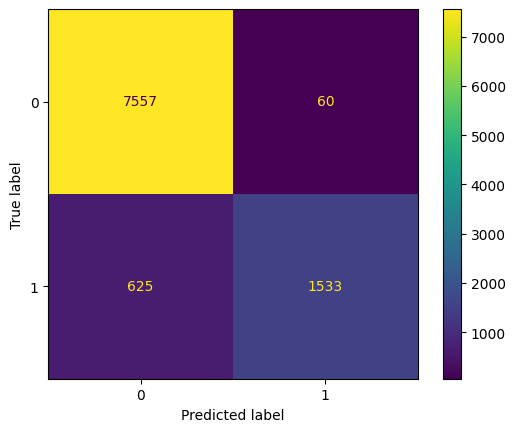

In [25]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();